 <img src="escudo.jpg" width="170" align="right" >
 
# PROYECTO FINAL PDS 
## Semestre 2023-2
## Noemi Alean Acuña
## Ricardo Cuesta




In [1]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.io.wavfile import read#para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
import numpy as np
%matplotlib inline
import scipy.signal as sp
from numpy.fft import fft, ifft
from IPython.display import Audio # para escuchar la senal
%matplotlib inline
import scipy.signal as sp
import scipy.signal as signal
from numpy.fft import fft, ifft

### Definicion de la señal

In [2]:
#frecuencia
f = 15000 #frecuencia central
#frecuencia final (Hz)
ff=27000
#frecencia de muestreo (muestras)
fs = 50000
freq=500#frecuencia inicial del espectro
fr=500#frecuencia entre muestras del espectro

In [3]:
# Especificaciones del filtro
order = 1  # Orden del filtro
cutoff_freq = 10000  # Frecuencia de corte en Hz
cutoff_freq2 = 17000  # Frecuencia de corte en Hz
sampling_freq = fs  # Frecuencia de muestreo en Hz
ripple = 1  # Rizado en decibeles
ripple_pass = 1  # Rizado en la banda de paso (dB)
ripple_stop = 10  # Atenuación en la banda (dB)
sample_rate = fs
length = 1.0  #length of signal
t = np.arange(0,length,1.0/sample_rate) ## every item in array

In [4]:
#creamos un espectro de señales periodicas sen
# sampling interval
ts = 1.0/fs
t = np.arange(0,1,ts)
#creamos un espectro de señales periodicas sen
ts = 1.0/fs
t = np.arange(0,1,ts)
x = np.sin(2*np.pi*freq*t)
i=freq
while freq<ff:
  freq=freq+(fr)
  x =x+ np.sin(2*np.pi*freq*t)
  i=i+1

C:\Users\HP\AppData\Local\Temp\ipykernel_10376\1117222617.py:14: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(Xft), 'r', \


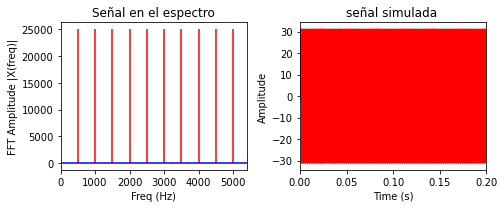

In [5]:
#plt.title(' ')
import scipy.fft as fft
from numpy.fft import fft, ifft
Xft=0
Xft = fft(x)
N = len(Xft)
n = np.arange(N)
T = N/fs
freq = n/T

plt.figure(figsize = (7, 3))
plt.subplot(121)
Xft=np.abs(Xft)
plt.stem(freq, np.abs(Xft), 'r', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.title('Señal en el espectro')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, ff/5)

plt.subplot(122)
#plt.plot(t, ifft(Xft), 'r')
plt.plot(t, x, 'r')
plt.xlabel('Time (s)')
plt.title('señal simulada ')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.xlim(0,0.2)
plt.show()
spectro=x
Xft=np.abs(Xft)



In [6]:
#normaliza x
mediaSenal=np.mean(x)
maxiSenal=np.max(abs(x))
x=(x-mediaSenal)/maxiSenal
t=np.arange(0,len(x)/fs,1.0/fs)
print(Xft)

mediaSenal=np.mean(Xft)
maxiSenal=np.max(abs(Xft))
Xft=(x-mediaSenal)/maxiSenal
t=np.arange(0,len(Xft)/fs,1.0/fs)
#plt.plot(Xft)
Xft=(Xft)


[7.89247955e-10 1.60595975e-09 1.28162176e-09 ... 5.68668979e-10
 1.28162176e-09 1.60595975e-09]


## 2.  espectro  con los diferentes filtros

### Filtros de Butterworth: 
El diseño de filtro Butterworth es un método utilizado para  diseñar filtros IIR (Infinite Impulse Response) con una respuesta en frecuencia lo más plana posible en la banda de paso y una caída gradual en la banda de rechazo. 
Estos filtros son conocidos por su respuesta en frecuencia suave y su capacidad de  eliminar eficientemente las frecuencias no deseadas.
El diseño de un filtro Butterworth implica especificar la frecuencia de corte, el tipo de filtro (paso bajo, paso alto, etc.) y el orden del filtro. El orden del filtro determina la cantidad de polos en el sistema y afecta la forma y la eficiencia del filtro. A medida que aumenta el orden del filtro, se logra una mayor atenuación en la banda de rechazo, pero también se introduce una mayor distorsión en la fase.

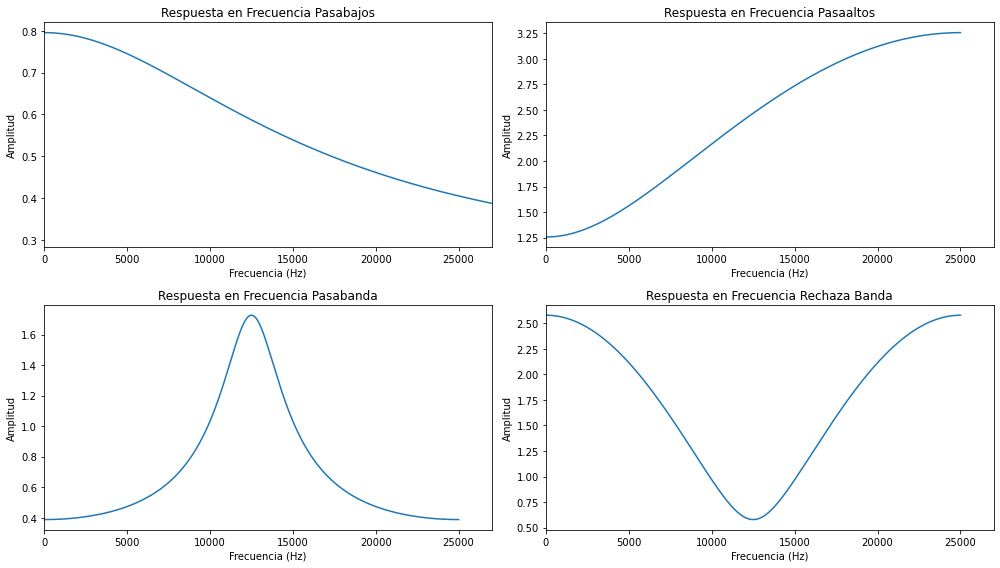

[0.00000e+00 5.00010e-01 1.00002e+00 ... 2.49990e+04 2.49995e+04
 2.50000e+04]


In [7]:
import numpy as np
import matplotlib.pyplot as plt


def butterworth_filter_response(order, cutoff_frequency, sampling_rate, filter_type='lowpass', bandwidth=None, center_frequency=None):
    # Convertir frecuencia de corte a radianes por segundo
    omega_c = 2 * np.pi * cutoff_frequency / sampling_rate

    # Parámetros adicionales para pasabanda y rechaza banda
    if filter_type in ['bandpass', 'bandstop']:
        if bandwidth is None or center_frequency is None:
            raise ValueError("Se requieren los parámetros 'bandwidth' y 'center_frequency' para filtros pasabanda y rechaza banda.")
        B = 2 * np.pi * bandwidth / sampling_rate
        s0 = 2 * np.pi * center_frequency / sampling_rate

    # Coeficientes del filtro Butterworth
    if filter_type == 'lowpass':
        b = [1.0 / (1.0 + omega_c)**order]
        a = [1.0, -1.0 / (1.0 + omega_c)**order]

    elif filter_type == 'highpass':
        b = [1.0, -1.0 / (1.0 + omega_c)**order]
        a = [1.0 / (1.0 + omega_c)**order]

    elif filter_type == 'bandpass':
        #b = [0.0] * (order + 1)
        #b[order] = B
        #b[order // 2] = 1.0
        b=[1.0]

        a = np.poly1d([1.0, 0.0, omega_c**2])

    elif filter_type == 'bandstop':
        a = [1.0]
        b = np.poly1d([1.0, 0.0, omega_c**2])

    else:
        raise ValueError("Tipo de filtro no válido. Use 'lowpass', 'highpass', 'bandpass', o 'bandstop'.")

    # Respuesta en frecuencia del filtro
    freq = np.linspace(0, sampling_rate/2, fs)

    omega = 2 * np.pi * freq / sampling_rate
    H = np.abs(np.polyval(b, np.exp(1j * omega)) / np.polyval(a, np.exp(1j * omega)))

    return freq, H
#    center_frequency=15000

# Especificaciones del filtro
#order = 16  # Orden del filtro
#cutoff_freq =ff# 17000  # Frecuencia de corte en Hz
#cutoff_freq2 = 25000  # Frecuencia de corte en Hz
#sampling_freq = 8000  # Frecuencia de muestreo en Hz
#fs = sampling_freq

# Calcular respuestas en frecuencia para cada tipo de filtro
freq_lowpass, response_lowpass = butterworth_filter_response(order, cutoff_freq, fs, filter_type='lowpass')
freq_highpass, response_highpass = butterworth_filter_response(order, cutoff_freq, fs, filter_type='highpass')
freq_bandpass, response_bandpass = butterworth_filter_response(order, cutoff_freq, fs, filter_type='bandpass', bandwidth=cutoff_freq2-cutoff_freq, center_frequency=(cutoff_freq+cutoff_freq2)/2)
freq_bandstop, response_bandstop = butterworth_filter_response(order, cutoff_freq, fs, filter_type='bandstop', bandwidth=cutoff_freq2-cutoff_freq, center_frequency=(cutoff_freq+cutoff_freq2)/2)

# Graficar respuestas en frecuencia
plt.figure(figsize=(14, 8))


# Respuesta en frecuencia Pasabajos
plt.subplot(2, 2, 1)
plt.plot( response_lowpass)

plt.title('Respuesta en Frecuencia Pasabajos')

plt.xlabel('Frecuencia (Hz)')
plt.xlim(0, ff)
plt.ylabel('Amplitud')

# Respuesta en frecuencia Pasaaltos
plt.subplot(2, 2, 2)
plt.plot(freq_highpass, response_highpass)
#plt.plot( Xft, label='Señal Original')
plt.title('Respuesta en Frecuencia Pasaaltos')
plt.xlim(0, ff)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

# Respuesta en frecuencia Pasabanda
plt.subplot(2, 2, 3)
plt.plot(freq_bandpass, response_bandpass)
plt.title('Respuesta en Frecuencia Pasabanda')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0, ff)
plt.ylabel('Amplitud')

# Respuesta en frecuencia Rechaza Banda
plt.subplot(2, 2, 4)
plt.plot(freq_bandstop, response_bandstop)
plt.title('Respuesta en Frecuencia Rechaza Banda')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, ff)
plt.tight_layout()
plt.show()
print(freq_bandstop)


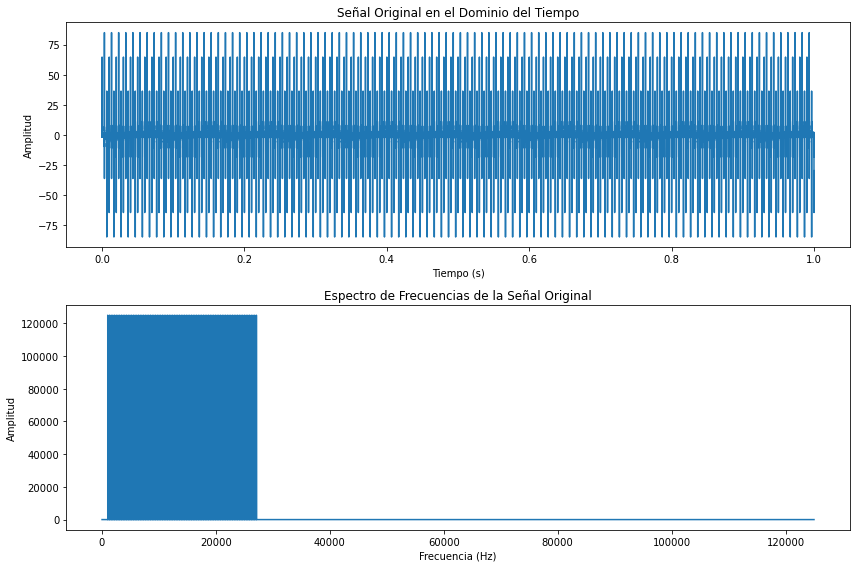

In [9]:
# Especificaciones de la señal
freq_start = 1000  # Frecuencia inicial en Hz
freq_end = 27000   # Frecuencia final en Hz
sampling_rate = 250000  # Frecuencia de muestreo en Hz

# Crear señal
ts = 1.0 / sampling_rate
t = np.arange(0, 1, ts)
x = np.sin(2 * np.pi * freq_start * t)

freq = freq_start
while freq < freq_end:
    freq += 300
    x += np.sin(2 * np.pi * freq * t)

# Calcular espectro de frecuencias de la señal original
fft_values = np.fft.fft(x)
fft_freq = np.fft.fftfreq(len(x), ts)
magnitude_spectrum = np.abs(fft_values)[:len(fft_values)//2]

# Graficar señal original y su espectro
plt.figure(figsize=(12, 8))

# Señal original en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Señal Original en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Espectro de frecuencias de la señal original
plt.subplot(2, 1, 2)
plt.plot(fft_freq[:len(fft_freq)//2], magnitude_spectrum)
plt.title('Espectro de Frecuencias de la Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


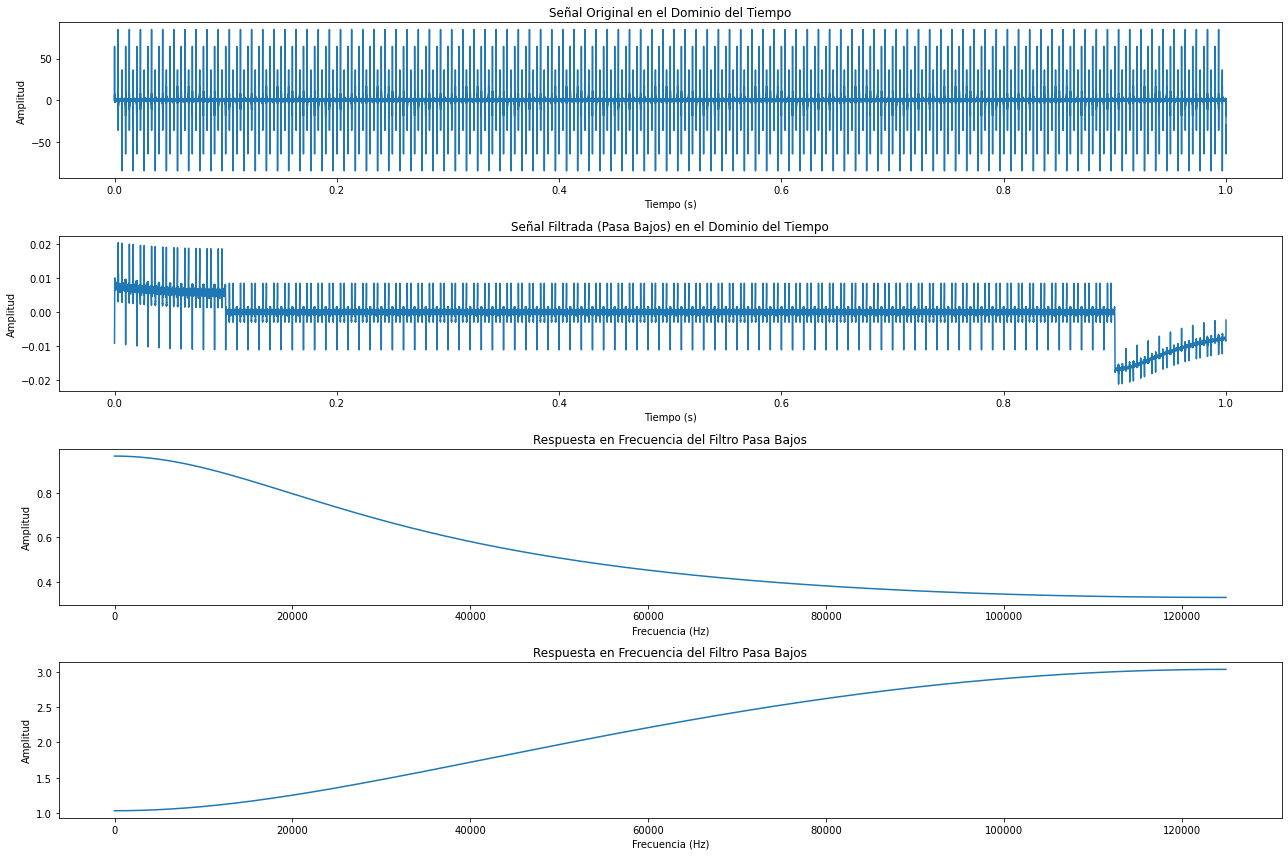

In [10]:
# Especificaciones del filtro
order = 6  # Orden del filtro
cutoff_frequency_lowpass = 5000  # Frecuencia de corte en Hz para el filtro pasa bajos

# Calcular respuesta en frecuencia del filtro pasa bajos
freq_lowpass_signal, response_lowpass_signal = butterworth_filter_response(order, cutoff_frequency_lowpass, sampling_rate, filter_type='lowpass')

# Calcular respuesta en frecuencia del filtro pasa altas
freq_highpass_signal, response_highpass_signal = butterworth_filter_response(order, cutoff_frequency_lowpass, sampling_rate, filter_type='highpass')
# Aplicar filtro pasa bajos a la señal
filtered_signal_lowpass = np.convolve(x, response_lowpass_signal, mode='same') / sum(response_lowpass_signal)
filtered_signal_highpass = np.convolve(x, response_highpass_signal, mode='same') / sum(response_highpass_signal)
# Graficar señal original, señal filtrada (pasa bajos) y respuesta en frecuencia del filtro
plt.figure(figsize=(18, 12))

# Señal original en el dominio del tiempo
plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.title('Señal Original en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Señal filtrada (pasa bajos) en el dominio del tiempo
plt.subplot(4, 1, 2)
plt.plot(t, filtered_signal_lowpass)
plt.title('Señal Filtrada (Pasa Bajos) en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Respuesta en frecuencia del filtro pasa bajos
plt.subplot(4, 1, 3)
plt.plot(freq_lowpass_signal, response_lowpass_signal)
plt.title('Respuesta en Frecuencia del Filtro Pasa Bajos')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

# Respuesta en frecuencia del filtro pasa alto
plt.subplot(4, 1, 4)
plt.plot(freq_highpass_signal, response_highpass_signal)
plt.title('Respuesta en Frecuencia del Filtro Pasa Bajos')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()
